In [349]:
# Stock priceces prediction using LSTM algorythm.

In [322]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt 

In [323]:
#no magic numbers
training_range = 60
testing_showing_range = 20

In [324]:
dataset = pd.read_csv("DATA/KGHM_Train.csv")

In [325]:
dataset.head()

,Data,Open,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2000-02-01,10.017,10.291,9.884,10.056,1360434
1,2000-02-02,10.017,10.088,9.884,10.056,949016
2,2000-02-03,10.056,10.530,10.056,10.291,1178595
3,2000-02-04,10.357,10.496,9.986,10.257,2025722
4,2000-02-07,10.189,10.189,9.954,10.088,946851


In [326]:
dataset.isna().any()

Data          False
Open          False
Najwyzszy     False
Najnizszy     False
Zamkniecie    False
Wolumen       False
dtype: bool

In [327]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Data        5236 non-null   object 
 1   Open        5236 non-null   float64
 2   Najwyzszy   5236 non-null   float64
 3   Najnizszy   5236 non-null   float64
 4   Zamkniecie  5236 non-null   float64
 5   Wolumen     5236 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 245.6+ KB


<AxesSubplot:title={'center':'The open price'}>

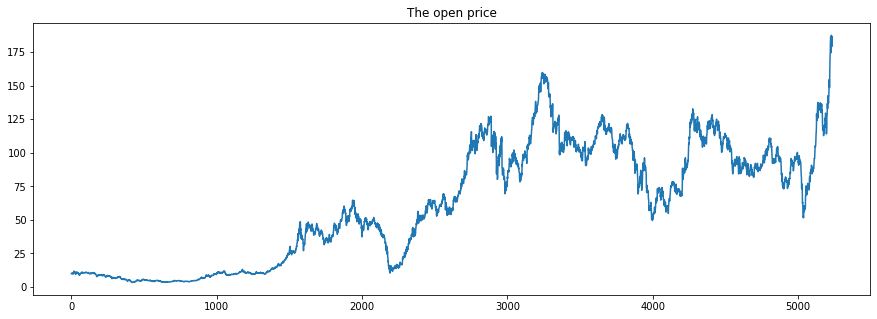

In [328]:
dataset['Open'].plot(figsize=(15,5), title="The open price")

<AxesSubplot:title={'center':'rolling mean vs everyday data'}>

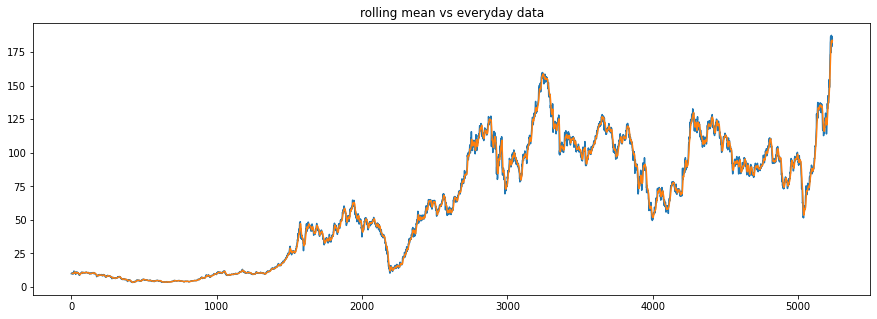

In [329]:
dataset.rolling(7).mean().head(20)
dataset["Open"].plot(figsize=(15,5), title="rolling mean vs everyday data")
dataset.rolling(window=7).mean()["Open"].plot()

<AxesSubplot:>

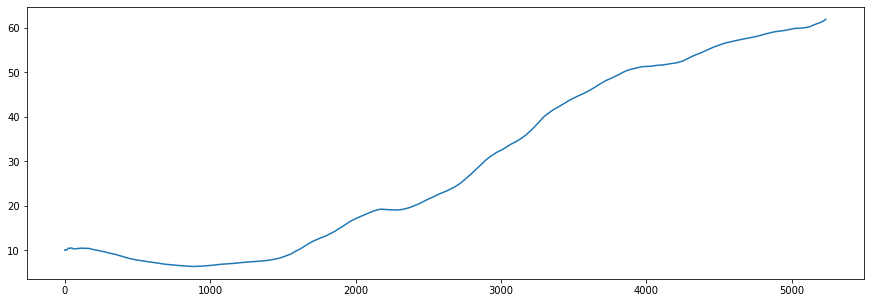

In [330]:
dataset["Open"].expanding(min_periods=1).mean().plot(figsize=(15,5))

In [331]:
training_set = dataset["Open"]
training_set = pd.DataFrame(training_set)

In [332]:
#2 Data Preprocessing

In [333]:
#Data cleaning
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [334]:
training_set_scaled[60]

array([0.03443845])

In [335]:
#now we will make a prediction for some day on base of priceses in last 60days

X_train, Y_train = [], []
#print(len(training_set))
for i in range(training_range, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-training_range:i, 0])
    Y_train.append(training_set_scaled[i, 0])
print(len(X_train))
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape)
xtrain = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
xtrain.shape

5176
(5176, 60)


(5176, 60, 1)

In [336]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [337]:
#3 Let a training NN begin
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

regression = Sequential()

In [338]:
#making layers

regression.add(LSTM(units = 50, return_sequences = True, kernel_initializer='glorot_uniform', input_shape = (X_train.shape[1], 1)))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 50, kernel_initializer='glorot_uniform', return_sequences = True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 50, kernel_initializer='glorot_uniform', return_sequences = True))
regression.add(Dropout(0.2))

regression.add(LSTM(units = 50, kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))

regression.add(Dense(units = 1))

regression.compile(optimizer = "adam", loss = "mean_squared_error")

regression.fit(X_train, Y_train, epochs = 100, batch_size = 30)

#epoch = frame of time
#batch_size = number of examples utilized in a single iteration

Epoch 1/100
173/173 [==============================] - 23s 93ms/step - loss: 0.0077
Epoch 2/100
173/173 [==============================] - 16s 91ms/step - loss: 0.0024
Epoch 3/100
173/173 [==============================] - 16s 91ms/step - loss: 0.0022
Epoch 4/100
173/173 [==============================] - 16s 91ms/step - loss: 0.0017
Epoch 5/100
173/173 [==============================] - 16s 93ms/step - loss: 0.0016
Epoch 6/100
173/173 [==============================] - 15s 88ms/step - loss: 0.0015
Epoch 7/100
173/173 [==============================] - 16s 91ms/step - loss: 0.0014
Epoch 8/100
173/173 [==============================] - 15s 86ms/step - loss: 0.0013
Epoch 9/100
173/173 [==============================] - 15s 87ms/step - loss: 0.0013
Epoch 10/100
173/173 [==============================] - 16s 90ms/step - loss: 0.0012
Epoch 11/100
173/173 [==============================] - 15s 88ms/step - loss: 0.0012
Epoch 12/100
173/173 [==============================] - 15s 87ms/step - lo

173/173 [==============================] - 17s 98ms/step - loss: 5.6497e-04
Epoch 94/100
173/173 [==============================] - 17s 98ms/step - loss: 5.3999e-04
Epoch 95/100
173/173 [==============================] - 17s 97ms/step - loss: 5.5387e-04
Epoch 96/100
173/173 [==============================] - 17s 97ms/step - loss: 5.2610e-04
Epoch 97/100
173/173 [==============================] - 17s 99ms/step - loss: 5.9034e-04
Epoch 98/100
173/173 [==============================] - 17s 96ms/step - loss: 4.9386e-04
Epoch 99/100
173/173 [==============================] - 17s 99ms/step - loss: 5.7909e-04
Epoch 100/100
173/173 [==============================] - 17s 98ms/step - loss: 5.1882e-04


In [344]:
dataset_test = pd.read_csv("DATA/KGHM_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values
test_set = dataset_test["Open"]
test_set = pd.DataFrame(test_set)

In [345]:
#5 Visualization

dataset_total = pd.concat((dataset["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - training_range:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(training_range, training_range+testing_showing_range):
    X_test.append(inputs[i-training_range:i, 0])
X_test = np.array(X_test)
#xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regression.predict(X_test)

predicted_stock_price = predicted_stock_price.reshape(predicted_stock_price.shape[0],predicted_stock_price.shape[1])
print(predicted_stock_price)


[[0.9555274 ]
 [0.95872676]
 [0.9904841 ]
 [1.0116996 ]
 [1.0566705 ]
 [1.0245715 ]
 [1.040688  ]
 [1.0507854 ]
 [1.0279024 ]
 [1.0420731 ]
 [1.0201998 ]
 [1.0350744 ]
 [1.0150211 ]
 [1.0293871 ]
 [0.9916482 ]
 [0.99193406]
 [0.98647964]
 [0.98922133]
 [0.88766885]
 [0.96769905]]


/home/adamostrich/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [346]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [347]:
#predicted_stock_price = pd.DataFrame(predicted_stock_price)
print(predicted_stock_price)
#print(predicted_stock_price)

[[179.2383 ]
 [179.82689]
 [185.66934]
 [189.57239]
 [197.84578]
 [191.94046]
 [194.90544]
 [196.76308]
 [192.55324]
 [195.16026]
 [191.13618]
 [193.87268]
 [190.18346]
 [192.8264 ]
 [185.8835 ]
 [185.9361 ]
 [184.93263]
 [185.43703]
 [166.75424]
 [181.47754]]


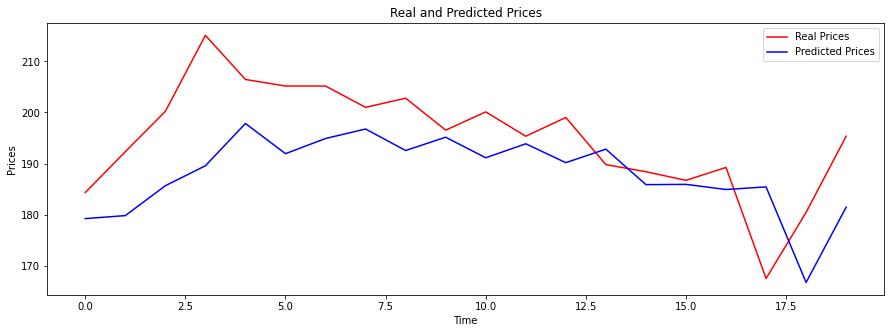

In [348]:
xs = np.arange(0, testing_showing_range, 1)
plt.figure(figsize=(15,5))
#plt.plot(xs, training_set[training_range:training_range+testing_showing_range],'red',label='Real Prices')
plt.plot(xs, test_set, 'red',label='Real Prices')
plt.plot(predicted_stock_price,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real and Predicted Prices')
plt.legend(loc='best')